In [5]:
from warnings import filterwarnings
filterwarnings('ignore')

import numpy as np
import pandas as pd 
import seaborn as sns
import scipy.stats
from scipy.stats import stats
from scipy.stats import shapiro
import statsmodels.stats.api as sms
import matplotlib.pyplot as plt

In [6]:
DF = pd.read_csv("Food_Supply_Quantity_kg_Data.csv")
df = DF.copy()

In [7]:
df.loc[154]

Country                             Turkey
Alcoholic Beverages                 0.6474
Animal fats                         0.1459
Animal Products                    12.3156
Aquatic Products, Other                  0
Cereals - Excluding Beer             9.708
Eggs                                0.3956
Fish, Seafood                       0.2582
Fruits - Excluding Wine             6.8321
Meat                                2.0694
Milk - Excluding Butter             9.3619
Miscellaneous                       0.0101
Offals                              0.0857
Oilcrops                             0.272
Pulses                               0.682
Spices                              0.1251
Starchy Roots                       2.4947
Stimulants                          0.2002
Sugar & Sweeteners                  1.7004
Sugar Crops                              0
Treenuts                            0.4664
Vegetable Oils                      1.0174
Vegetables                         13.5284
Vegetal Pro

In [8]:
df

,Country,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,...,Vegetables,Vegetal Products,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,6.7642,40.5645,4.5,29.8,0.012321,0.000321,0.001467,0.010533,38042000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,11.7753,31.2304,22.3,6.2,0.030511,0.001085,0.022883,0.006543,2858000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,11.6484,40.3651,26.6,3.9,0.013572,0.001168,0.006545,0.005859,43406000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,2.3041,45.0722,6.8,25,0.000143,0.000006,0.000041,0.000095,31427000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,5.4495,33.3233,19.1,NaN,0.025773,0.003093,0.019588,0.003093,97000.0,%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
165,Venezuela (Bolivarian Republic of),2.5952,0.0403,14.7565,0.0000,12.9253,0.3389,0.9456,7.6460,3.8328,...,4.1474,35.2416,25.2,21.2,0.001480,0.000035,0.000719,0.000726,28516000.0,%
166,Vietnam,1.4591,0.1640,8.5765,0.0042,16.8740,0.3077,2.6392,5.9029,4.4382,...,11.9508,41.4232,2.1,9.3,0.000301,0.000000,0.000260,0.000041,95656000.0,%
167,Yemen,0.0364,0.0446,5.7874,0.0000,27.2077,0.2579,0.5240,5.1344,2.7871,...,3.2135,44.2126,14.1,38.9,0.000192,0.000031,0.000003,0.000158,29162000.0,%
168,Zambia,5.7360,0.0829,6.0197,0.0000,21.1938,0.3399,1.6924,1.0183,1.8427,...,3.4649,43.9789,6.5,46.7,0.001495,0.000039,0.000655,0.000801,17861000.0,%


In [9]:
df.isnull().any().sum()

6

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().any().sum()

0

In [12]:
df["iyilesme_orani"]=df["Recovered"]/(df["Confirmed"] - df["Active"])
df["ölüm_oranı"]=df["Deaths"]/(df["Confirmed"] - df["Active"])
df = df[df.Deaths != 0]

In [132]:
sms.DescrStatsW(df["ölüm_oranı"]).tconfint_mean()
#df["ölüm_oranı"].describe().T

(0.07356657656737219, 0.09909347100861644)

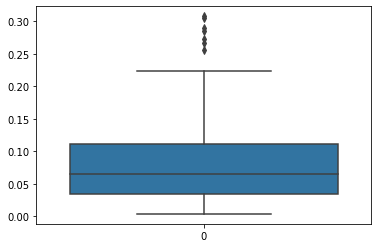

In [134]:
sns.boxplot(data = df["ölüm_oranı"]);
#sns.distplot(df["ölüm_oranı"], kde = False, bins="auto");

In [15]:
df["ölüm_oranı"].quantile([0,0.25,0.5,0.75,1]) 

0.00    0.003429
0.25    0.037344
0.50    0.075123
0.75    0.145979
1.00    0.973506
Name: ölüm_oranı, dtype: float64

In [16]:
Q1 = df["ölüm_oranı"].quantile(0.25)
Q3 = df["ölüm_oranı"].quantile(0.75)
IQR = Q3 - Q1

alt_sinir = Q1- 1.5*IQR
ust_sinir = Q3 + 1.5*IQR

In [17]:
ust_sinir

0.3089299389842765

In [18]:
df = df[(df.ölüm_oranı >= alt_sinir) & (df.ölüm_oranı <= ust_sinir)]
dff =  df.drop("Country",axis=1).drop("Unit (all except Population)",axis=1).drop("Undernourished",axis=1)

In [19]:
df["ölüm_oranı"].describe().T

count    122.000000
mean       0.086330
std        0.071209
min        0.003429
25%        0.033384
50%        0.065293
75%        0.111111
max        0.307692
Name: ölüm_oranı, dtype: float64

In [135]:
dff

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Vegetables,Vegetal Products,Obesity,Confirmed,Deaths,Recovered,Active,Population,iyilesme_orani,ölüm_oranı
0,0.0014,0.1973,9.4341,0.0,24.8097,0.2099,0.0350,5.3495,1.2020,7.5828,...,6.7642,40.5645,4.5,0.012321,0.000321,0.001467,0.010533,38042000.0,0.820588,0.179412
1,1.6719,0.1357,18.7684,0.0,5.7817,0.5815,0.2126,6.7861,1.8845,15.7213,...,11.7753,31.2304,22.3,0.030511,0.001085,0.022883,0.006543,2858000.0,0.954745,0.045255
2,0.2711,0.0282,9.6334,0.0,13.6816,0.5277,0.2416,6.3801,1.1305,7.6189,...,11.6484,40.3651,26.6,0.013572,0.001168,0.006545,0.005859,43406000.0,0.848566,0.151434
3,5.8087,0.0560,4.9278,0.0,9.1085,0.0587,1.7707,6.0005,2.0571,0.8311,...,2.3041,45.0722,6.8,0.000143,0.000006,0.000041,0.000095,31427000.0,0.866667,0.133333
5,4.2672,0.2234,19.3454,0.0,8.4102,0.9979,0.4693,6.0435,7.0421,10.2328,...,4.3503,30.6559,28.5,0.013970,0.000699,0.004088,0.009184,44939000.0,0.854021,0.145979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,3.5664,0.2100,17.8865,0.0,10.2510,0.7764,0.6058,5.3746,3.7863,12.3906,...,3.9333,32.1076,28.9,0.020205,0.000540,0.014862,0.004803,3519000.0,0.964945,0.035055
163,0.6835,0.1353,14.4463,0.0,10.5365,0.3566,0.1218,5.2150,1.8621,11.7952,...,14.8354,35.5540,15.3,0.007427,0.000030,0.005939,0.001458,33471000.0,0.994995,0.005005
165,2.5952,0.0403,14.7565,0.0,12.9253,0.3389,0.9456,7.6460,3.8328,9.3920,...,4.1474,35.2416,25.2,0.001480,0.000035,0.000719,0.000726,28516000.0,0.953488,0.046512
168,5.7360,0.0829,6.0197,0.0,21.1938,0.3399,1.6924,1.0183,1.8427,1.7570,...,3.4649,43.9789,6.5,0.001495,0.000039,0.000655,0.000801,17861000.0,0.943548,0.056452


In [137]:
corr = df.corr(method="spearman")
corr.style.background_gradient(cmap='coolwarm')

,Alcoholic Beverages,Animal fats,Animal Products,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,Miscellaneous,Offals,Oilcrops,Pulses,Spices,Starchy Roots,Stimulants,Sugar & Sweeteners,Sugar Crops,Treenuts,Vegetable Oils,Vegetables,Vegetal Products,Obesity,Confirmed,Deaths,Recovered,Active,Population,iyilesme_orani,ölüm_oranı
Alcoholic Beverages,1,0.398895,0.362229,0.31631,-0.519859,0.184651,0.050294,-0.250849,0.419205,0.262837,-0.0853689,-0.00599764,-0.120864,-0.38788,-0.146815,0.177007,0.0574847,0.13201,-0.150139,-0.136751,-0.131144,-0.285992,-0.362203,0.164385,0.282896,0.346434,0.280867,0.165813,-0.159665,-0.0754873,0.0776286
Animal fats,0.398895,1,0.725662,0.234028,-0.559697,0.410347,-0.171189,-0.146703,0.535313,0.664611,-0.158766,0.11843,-0.491034,-0.449587,-0.148425,-0.112597,0.423157,0.325006,-0.168093,0.134016,-0.115515,0.153206,-0.725814,0.501516,0.523209,0.56431,0.593737,0.342651,-0.0968611,0.0920398,-0.0920696
Animal Products,0.362229,0.725662,1,0.404094,-0.675079,0.563832,-0.0876773,-0.19149,0.623179,0.894733,-0.0899306,0.0586677,-0.498895,-0.503364,-0.169441,-0.301199,0.574182,0.369231,-0.0403984,0.151278,-0.0903539,0.158023,-0.999993,0.520335,0.596538,0.596162,0.643402,0.412694,-0.155584,0.141289,-0.139643
"Aquatic Products, Other",0.31631,0.234028,0.404094,1,-0.26811,0.508347,0.383586,-0.0800803,0.474816,0.169649,-0.0492704,-0.0147132,-0.0264673,-0.265381,0.214695,-0.283557,0.285555,0.318786,0.0277215,0.136007,-0.0258962,0.0612514,-0.403564,0.217816,0.452205,0.396,0.456539,0.249994,0.00437907,0.191982,-0.191886
Cereals - Excluding Beer,-0.519859,-0.559697,-0.675079,-0.26811,1,-0.33927,-0.00509879,-0.0309,-0.476196,-0.58416,0.0568277,0.0188785,0.299616,0.462395,0.214927,-0.100968,-0.282162,-0.169357,0.0795767,-0.0739782,0.185437,-0.132922,0.675092,-0.477998,-0.60819,-0.601574,-0.611693,-0.441,0.245426,-0.112474,0.111278
Eggs,0.184651,0.410347,0.563832,0.508347,-0.33927,1,0.0948548,0.0609113,0.622889,0.324225,-0.093729,-0.0417191,-0.274238,-0.325243,-0.0268804,-0.311559,0.425554,0.468339,0.0630771,0.190952,0.0781309,0.178858,-0.5636,0.477548,0.502355,0.491348,0.519595,0.366547,0.0374198,0.151487,-0.150221
"Fish, Seafood",0.050294,-0.171189,-0.0876773,0.383586,-0.00509879,0.0948548,1,0.0192617,0.179218,-0.384934,0.129883,-0.0731314,0.360898,-0.110135,0.199152,-0.115739,-0.00805961,0.134118,0.173878,0.0116782,0.110749,-0.0963152,0.0882589,-0.0872831,0.0530399,0.0528417,0.0660529,-0.0498415,-0.0739572,0.0784579,-0.0792509
Fruits - Excluding Wine,-0.250849,-0.146703,-0.19149,-0.0800803,-0.0309,0.0609113,0.0192617,1,0.0411373,-0.204074,0.0549964,-0.00613311,0.203324,0.182817,-0.0701246,-0.0599264,-0.0751008,-0.0198499,0.116283,0.0846485,-0.0235906,0.0521808,0.191589,0.174289,0.0823043,0.0994016,0.0111724,0.139281,-0.0071079,-0.106751,0.105026
Meat,0.419205,0.535313,0.623179,0.474816,-0.476196,0.622889,0.179218,0.0411373,1,0.317483,0.077217,0.128293,-0.186772,-0.337324,-0.142136,-0.232631,0.358198,0.538413,0.0533322,0.0794142,0.193004,0.0414743,-0.623278,0.580655,0.530469,0.536212,0.544328,0.353068,-0.144997,0.108416,-0.106718
Milk - Excluding Butter,0.262837,0.664611,0.894733,0.169649,-0.58416,0.324225,-0.384934,-0.204074,0.317483,1,-0.154589,0.0287655,-0.55604,-0.355033,-0.194677,-0.231084,0.50949,0.206757,-0.175653,0.107014,-0.146299,0.18393,-0.894852,0.462936,0.477974,0.480644,0.533767,0.3555,-0.13396,0.101516,-0.0994809


In [22]:
shapiro(dff["ölüm_oranı"]) #H0 Hipotezi: Dağılımımız ve teorik normal dağılım arasında istatistiki olarak anlamlı bir fark yoktur.
                            #H1 Hipotez: Dağılımımız ve teorik normal dağılım arasında istatistiki olarak anlamlı bir fark vardır.

(0.8577079772949219, 1.8248751398886043e-09)

In [23]:
for x in dff.columns:
    if(shapiro(dff[x])[1]>0.05):
        print(x)

Animal Products
Vegetal Products


In [24]:
for x in dff.columns[-8:]:
  for y in dff.columns[0:23] :
    if ((stats.spearmanr(dff[x],dff[y])[1]<0.05) & (stats.spearmanr(dff[x],dff[y])[0]!=1) & (stats.spearmanr(dff[x],dff[y])[0]!=-1) & (stats.spearmanr(dff[x],dff[y])[0]!=0) & (x!=y)):
        print(stats.spearmanr(dff[x],dff[y]),x,"<->",y)

SpearmanrResult(correlation=0.501516031103102, pvalue=3.999508851125683e-09) Obesity <-> Animal fats
SpearmanrResult(correlation=0.5203345004136694, pvalue=8.10407014098516e-10) Obesity <-> Animal Products
SpearmanrResult(correlation=0.21781623730541164, pvalue=0.015947977026497195) Obesity <-> Aquatic Products, Other
SpearmanrResult(correlation=-0.4779982924748459, pvalue=2.579134130998607e-08) Obesity <-> Cereals - Excluding Beer
SpearmanrResult(correlation=0.47754799318196245, pvalue=2.6692284156249113e-08) Obesity <-> Eggs
SpearmanrResult(correlation=0.5806547567174197, pvalue=2.3730683209539918e-12) Obesity <-> Meat
SpearmanrResult(correlation=0.4629355779494257, pvalue=7.921636502394427e-08) Obesity <-> Milk - Excluding Butter
SpearmanrResult(correlation=-0.30438432186795067, pvalue=0.0006527799524573681) Obesity <-> Oilcrops
SpearmanrResult(correlation=-0.21734101603569564, pvalue=0.016185032376389394) Obesity <-> Pulses
SpearmanrResult(correlation=-0.18933151395137593, pvalue=0